## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

2. Я би спробувала такі методи:

Лінійні методи. Логістична регресія
Простий і швидкий метод. Підходить, якщо залежність між ознаками і цільовою змінною приблизно лінійна. Добре працює на «чистих» числових ознаках після масштабування.

️Дерев’яні методи. Дерево рішень 
Легко інтерпретувати результат. Підходить для виявлення нелінійних залежностей і роботи з категоріальними даними без кодування.

Ансамблеві методи. Беггінг (Random Forest) 
Комбінація багатьох дерев рішень. Зменшує ризик перенавчання.

Бустинг (Gradient Boosting, LightGBM, CatBoost)
Дерева будуються послідовно, кожне виправляє помилки попереднього. Дуже добре працює з табличними даними і категоріальними ознаками.

Метод k найближчих сусідів (k-NN)
Прогноз для нового об’єкта будується на основі найбільш схожих об’єктів у тренувальній вибірці. Підходить для задач з невеликою кількістю ознак і збалансованими класами.


Використання лише accuracy є недостатнім, оскільки наші дані мають дисбаланс класів.
Для більш об’єктивного аналізу доцільно застосовувати ROC-AUC та F1-score.

ROC-AUC відображає здатність моделі відокремлювати класи незалежно від обраного порогу прийняття рішення. Це дозволяє порівнювати моделі між собою та коректно оцінювати їх дискримінаційну здатність.

F1-score поєднує у собі Precision та Recall, що є критично важливим при дисбалансі класів: метрика дозволяє знайти баланс між здатністю виявляти проблемних клієнтів і точністю цих прогнозів.

Таким чином, у дослідженні для оцінювання моделей буде використано ROC-AUC (як основну метрику відокремлення класів) та F1-score.

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score, classification_report

In [214]:
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')

In [216]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Logistic Regression

In [63]:
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    fpr, tpr, thresholds = roc_curve(targets, model_pipeline.predict_proba(inputs)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.4f}%")
#    confusion_matrix_ = confusion_matrix(targets, preds)
#    plt.figure()
#    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
#    plt.xlabel('Prediction')
#    plt.ylabel('Target')
#    plt.title('{} Confusion Matrix'.format(name))
#    plt.show()
    f1 = f1_score(targets, preds, pos_label=1)
    
    print(f"F1-score на {name}: {f1:.4f}\n")
    print("Звіт по классам:\n")
    print(classification_report(targets, preds, target_names=['no', 'yes']))

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    return preds

In [129]:
def add_features(X):
    X = X.copy()

    X["age_bin"] = pd.cut(X["age"], bins=[18,30,40,50,60,100], labels=False)

    X["duration_sq"] = X["duration"] ** 2
    X["campaign_duration"] = X["campaign"] * X["duration"]

    for col in ["job", "marital", "education", "contact", "poutcome"]:
        freqs = X[col].value_counts(normalize=True)
        X[f"{col}_freq"] = X[col].map(freqs)

    X["pdays_contacted"] = (X["pdays"] != 999).astype(int)
    X["was_contacted_before"] = (X["previous"] > 0).astype(int)

    X["emp_euribor_ratio"] = X["emp.var.rate"] / (X["euribor3m"] + 1e-5)
    X["price_conf_product"] = X["cons.price.idx"] * X["cons.conf.idx"]

    month_map = {
        'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
        'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12
    }
    dow_map = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5}

    X["month_idx"] = X["month"].map(month_map).astype(float)
    X["day_idx"] = X["day_of_week"].map(dow_map).astype(float)

    X["month_sin"] = np.sin(2 * np.pi * X["month_idx"] / 12)
    X["month_cos"] = np.cos(2 * np.pi * X["month_idx"] / 12)

    X["dow_sin"] = np.sin(2 * np.pi * X["day_idx"] / 5)
    X["dow_cos"] = np.cos(2 * np.pi * X["day_idx"] / 5)

    for col in ["duration", "campaign", "previous", "pdays"]:
        X[f"{col}_log"] = np.log1p(X[col].replace({999: 0})) 

    return X

In [218]:
X = bank_df.drop(columns=['y'])
y = bank_df['y'].map({'no': 0, 'yes': 1})
input_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target_col = 'y'
numeric_cols = X[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = X[input_cols].select_dtypes('object').columns.tolist()
bank_df[numeric_cols] = bank_df[numeric_cols].astype('float32')

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)


Area under ROC score on train dataset: 0.9321%
F1-score на train: 0.4891

Звіт по классам:

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     21928
         yes       0.68      0.38      0.49      2784

    accuracy                           0.91     24712
   macro avg       0.80      0.68      0.72     24712
weighted avg       0.90      0.91      0.90     24712



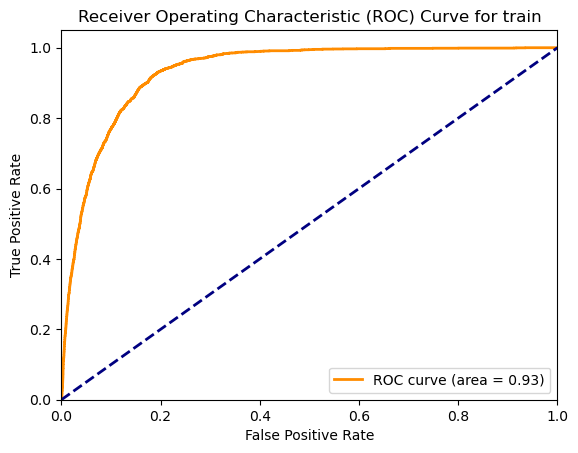

Area under ROC score on Validation dataset: 0.9299%
F1-score на Validation: 0.4828

Звіт по классам:

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.65      0.39      0.48       928

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



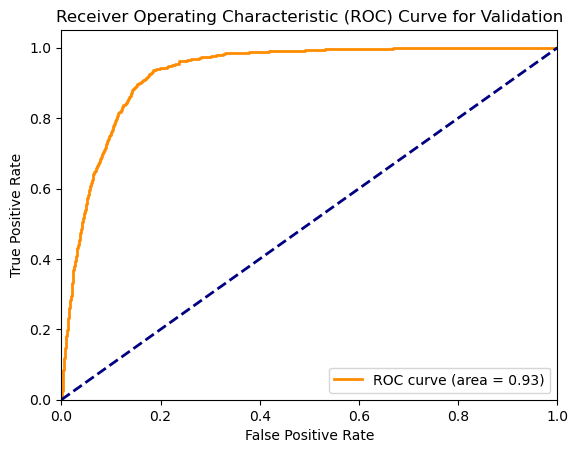

In [160]:
# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(X_train, y_train)
train_preds = predict_and_plot(model_pipeline, X_train, y_train, 'train')
val_preds = predict_and_plot(model_pipeline, X_val, y_val, 'Validation')

In [146]:
X_train_fe = add_features(X_train)
X_val_fe = add_features(X_val)
numeric_cols_fe = X_train_fe[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols_fe = X_train_fe[input_cols].select_dtypes('object').columns.tolist()

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_fe),
        ('cat', categorical_transformer, categorical_cols_fe)
    ])

model_pipeline.fit(X_train_fe, y_train)
predict_proba_auroc(model_pipeline, X_train_fe, X_val_fe, y_train, y_val)

train 0.9320752452121259
val 0.9299147365441766


Додання нових ознак взагалі не змінили показники моделі

Area under ROC score on train dataset: 0.9399%
F1-score на train: 0.5474

Звіт по классам:

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     21928
         yes       0.67      0.46      0.55      2784

    accuracy                           0.91     24712
   macro avg       0.80      0.72      0.75     24712
weighted avg       0.90      0.91      0.91     24712



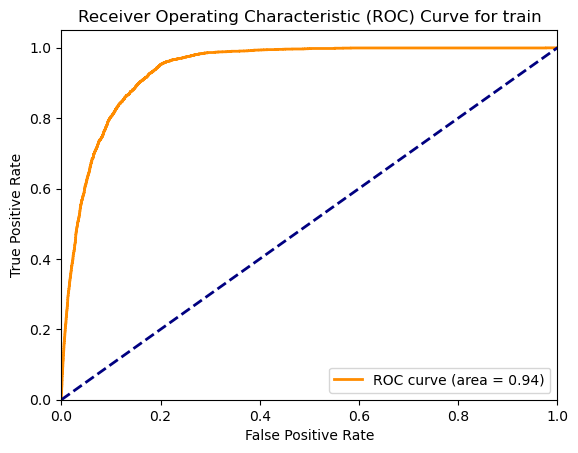

Area under ROC score on Validation dataset: 0.9402%
F1-score на Validation: 0.5417

Звіт по классам:

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.64      0.47      0.54       928

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



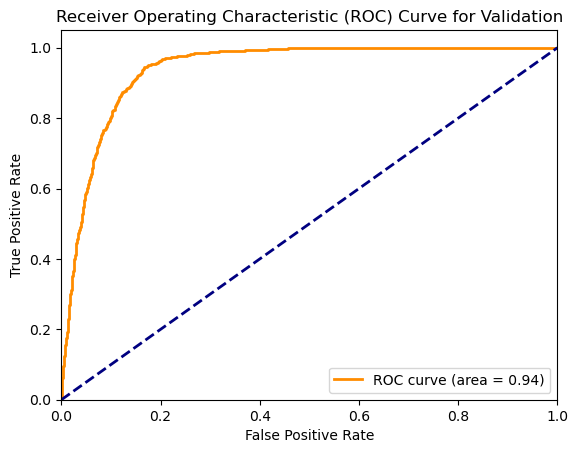

In [197]:
numeric_transformer_poly4 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('scaler', MinMaxScaler())
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor_poly4 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly4, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_poly4 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly4),
    ('classifier',  LogisticRegression(solver='liblinear', penalty='l1'))
])

# Тренуємо пайплайн
model_pipeline_poly4.fit(X_train, y_train)

train_preds = predict_and_plot(model_pipeline_poly4, X_train, y_train, 'train')
val_preds = predict_and_plot(model_pipeline_poly4, X_val, y_val, 'Validation')

Area under ROC score on train dataset: 0.9418%
F1-score на train: 0.5555

Звіт по классам:

              precision    recall  f1-score   support

          no       0.94      0.97      0.95     21928
         yes       0.67      0.47      0.56      2784

    accuracy                           0.91     24712
   macro avg       0.80      0.72      0.75     24712
weighted avg       0.91      0.91      0.91     24712



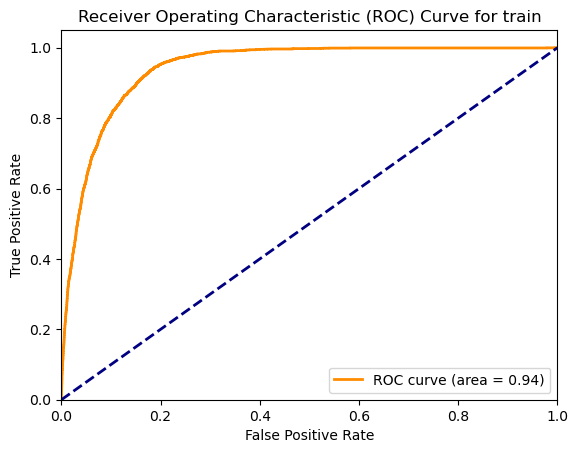

Area under ROC score on Validation dataset: 0.9413%
F1-score на Validation: 0.5418

Звіт по классам:

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.64      0.47      0.54       928

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



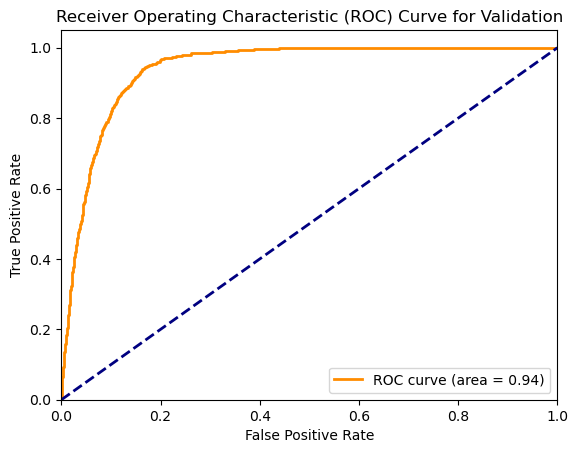

In [48]:
numeric_transformer_poly5 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scaler', MinMaxScaler())
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor_poly5 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly5, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_poly5 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly5),
    ('classifier',  LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline_poly5.fit(X_train, y_train)

train_preds = predict_and_plot(model_pipeline_poly5, X_train, y_train, 'train')
val_preds = predict_and_plot(model_pipeline_poly5, X_val, y_val, 'Validation')

### Decision tree

In [238]:
def roc_auc(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    fpr, tpr, thresholds = roc_curve(targets, model_pipeline.predict_proba(inputs)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"{name}: {roc_auc:.4f}%")
    f1 = f1_score(targets, preds, pos_label=1) 
    print(f"F1-score на {name}: {f1:.4f}\n")

    return preds

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)

tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_prep, y_train)

print("Найкращі параметри:", grid_search.best_params_)
print("Найкраща оцінка:", grid_search.best_score_)

Найкращі параметри: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Найкраща оцінка: 0.93166424470605


In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

X_train_prep_fe = preprocessor_fe.fit_transform(X_train_fe)
X_val_prep_fe = preprocessor_fe.transform(X_val_fe)

# tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc')
grid_search.best_estimator_.fit(X_train_prep_fe, y_train)

roc_auc(grid_search.best_estimator_, X_train_prep_fe, y_train, 'grid train')
roc_auc(grid_search.best_estimator_, X_val_prep_fe, y_val, 'grid val')

grid train: 0.9426%
F1-score на grid train: 0.5767

grid val: 0.9356%
F1-score на grid val: 0.5711



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'max_depth': [None] + list(range(3, 20)),  
    'min_samples_split': randint(2, 20),        
    'min_samples_leaf': randint(1, 20),         
    'criterion': ['gini', 'entropy']           
}

random_search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=50,               
    scoring='roc_auc',           
    cv=5,                    
    random_state=42,
    n_jobs=-1                
)

random_search.fit(X_train_prep, y_train)

print("Найкращі параметри:", random_search.best_params_)
print("Найкраща оцінка:", random_search.best_score_)

Найкращі параметри: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 13}
Найкраща оцінка: 0.9334960726536317


In [182]:
tree_fe = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=3,
    min_samples_split=13,
    class_weight='balanced',
    random_state=42
)
X_train_prep_fe = preprocessor_fe.fit_transform(X_train_fe)
X_val_prep_fe = preprocessor_fe.transform(X_val_fe)
tree_fe.fit(X_train_prep_fe, y_train)

roc_auc(tree_fe, X_train_prep_fe, y_train, 'grid train')
roc_auc(tree_fe, X_val_prep_fe, y_val, 'grid val')

grid train: 0.9483%
F1-score на grid train: 0.5997

grid val: 0.9340%
F1-score на grid val: 0.5858



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
roc_auc(grid_search.best_estimator_, X_train_prep, y_train, 'grid train')
roc_auc(grid_search.best_estimator_, X_val_prep, y_val, 'grid val')
roc_auc(random_search.best_estimator_, X_train_prep, y_train, 'random train')
roc_auc(random_search.best_estimator_, X_val_prep, y_val, 'random val')

grid train: 0.9369%
F1-score на grid train: 0.5485

grid val: 0.9325%
F1-score на grid val: 0.5444

random train: 0.9433%
F1-score на random train: 0.5495

random val: 0.9376%
F1-score на random val: 0.5402



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### kNN

In [35]:
def predict_proba_auroc(model, X_train, X_val, y_train, y_val):
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, train_probs, pos_label=1)
    train_roc_auc = auc(fpr, tpr)
    print('train', train_roc_auc)
    fpr, tpr, thresholds = roc_curve(y_val, val_probs, pos_label=1)
    val_roc_auc = auc(fpr, tpr)
    print('val', val_roc_auc)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
X_train_prep_knn = preprocessor.fit_transform(X_train_res)
X_val_prep_knn = preprocessor.transform(X_val)

knn = KNeighborsClassifier()
knn.fit(X_train_prep_knn, y_train_res)

predict_proba_auroc(knn, X_train_prep_knn, X_val_prep_knn, y_train_res, y_val)

train 0.9988441607294664
val 0.754890560875513


In [186]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res_fe, y_train_res_fe = ros.fit_resample(X_train_fe, y_train)
X_train_prep_knn_fe = preprocessor.fit_transform(X_train_res_fe)
X_val_prep_knn_fe = preprocessor.transform(X_val_fe)

knn = KNeighborsClassifier()
knn.fit(X_train_prep_knn_fe, y_train_res)

predict_proba_auroc(knn, X_train_prep_knn_fe, X_val_prep_knn_fe, y_train_res_fe, y_val)

train 0.9988441607294664
val 0.754890560875513


In [201]:
from sklearn.model_selection import GridSearchCV
params_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}
knn_gs = GridSearchCV(knn, params_knn, cv=5, scoring='roc_auc', n_jobs=-1)
knn_gs.fit(X_train_prep_knn, y_train_res)

knn_best = knn_gs.best_estimator_
predict_proba_auroc(knn_best, X_train_prep_knn, X_val_prep_knn, y_train_res, y_val)

train 1.0
val 0.8078007806972027


In [203]:
knn_gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [205]:
from sklearn.model_selection import RandomizedSearchCV
param_knn = {
    'n_neighbors': np.arange(3, 31),       
    'weights': ['uniform', 'distance'],    
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'p': [1, 2]                           
}

knn_rs = RandomizedSearchCV(knn, param_knn, n_iter=40, scoring='roc_auc', cv=3, random_state = 42)
knn_rs.fit(X_train_prep_knn, y_train_res)
knn_random_search_best = knn_rs.best_estimator_
predict_proba_auroc(knn_random_search_best, X_train_prep_knn, X_val_prep_knn, y_train_res, y_val)

train 1.0
val 0.808430674795981


In [207]:
knn_rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 30, 'metric': 'minkowski'}

### XGBoost

In [77]:
from xgboost import XGBClassifier

X_train_cat = categorical_transformer.fit_transform(X_train[categorical_cols])
X_val_cat   = categorical_transformer.transform(X_val[categorical_cols])


X_train_num = X_train[numeric_cols].to_numpy()
X_val_num   = X_val[numeric_cols].to_numpy()


X_train_hot = np.hstack([X_train_num, X_train_cat])
X_val_hot = np.hstack([X_val_num, X_val_cat])

xgb_clf = XGBClassifier(
    max_depth=3,
    n_estimators=10,
    scale_pos_weight = 7.85,
    device='cuda'
)

xgb_clf.fit(X_train_hot, y_train)

train_pred = xgb_clf.predict_proba(X_train_hot)
val_pred = xgb_clf.predict_proba(X_val_hot)

predict_proba_auroc(xgb_clf, X_train_hot, X_val_hot, y_train, y_val)


train 0.9407932360662062
val 0.9390784205622907


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:28] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


In [188]:
from xgboost import XGBClassifier

X_train_cat_fe = categorical_transformer.fit_transform(X_train_fe[categorical_cols_fe])
X_val_cat_fe   = categorical_transformer.transform(X_val_fe[categorical_cols_fe])


X_train_num_fe = X_train_fe[numeric_cols_fe].to_numpy()
X_val_num_fe   = X_val_fe[numeric_cols_fe].to_numpy()


X_train_hot_fe = np.hstack([X_train_num_fe, X_train_cat_fe])
X_val_hot_fe = np.hstack([X_val_num_fe, X_val_cat_fe])

xgb_clf_fe = XGBClassifier(
    max_depth=3,
    n_estimators=10,
    scale_pos_weight = 7.85,
    device='cuda'
)

xgb_clf_fe.fit(X_train_hot_fe, y_train)

train_pred = xgb_clf.predict_proba(X_train_hot)
val_pred = xgb_clf.predict_proba(X_val_hot)

predict_proba_auroc(xgb_clf_fe, X_train_hot_fe, X_val_hot_fe, y_train, y_val)


train 0.939487680030151
val 0.9391208016887589


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:21:28] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from functools import partial
import xgboost as xgb
def objective(params):
    clf = XGBClassifier(
    n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'], 
        subsample=params['subsample'], 
        colsample_bytree=params['colsample_bytree'], 
        gamma=params['gamma'],  
        reg_alpha=params['reg_alpha'],  
        reg_lambda=params['reg_lambda'], 
        enable_categorical=True,
        use_label_encoder=False,
        missing=np.nan,
        early_stopping_rounds=10,
        random_state=42,
        device='cuda'
    )

    clf.fit(
        X_train_hot,
        y_train,
        eval_set=[(X_val_hot, y_val)],
        verbose=False)
    pred = clf.predict_proba(X_val_hot)
    fpr, tpr, thresholds = roc_curve(y_val, pred[:,1], pos_label=1)
    auroc = auc(fpr, tpr)
    return {'loss': -auroc, 'status': STATUS_OK}

# Простір гіперпараметрів
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

# Оптимізація
trials = Trials()
xgb_objective = partial(objective)
best = fmin(fn=xgb_objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

# Перетворення значень гіперпараметрів у кінцеві типи
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_clf = xgb.XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    random_state=42,
    device='cuda'
)

final_clf.fit(X_train_hot, y_train)


  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:09] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:09] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  5%|██▍                                             | 1/20 [00:00<00:06,  3.12trial/s, best loss: -0.9487806028586254]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:09] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:09] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|████▊                                           | 2/20 [00:00<00:05,  3.39trial/s, best loss: -0.9487806028586254]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|█████████▌                                      | 4/20 [00:01<00:04,  3.71trial/s, best loss: -0.9487806028586254]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 25%|████████████                                    | 5/20 [00:01<00:03,  4.37trial/s, best loss: -0.9488657336430963]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:10] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|██████████████▍                                 | 6/20 [00:02<00:07,  1.97trial/s, best loss: -0.9488657336430963]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:11] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:11] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|███████████████████▏                            | 8/20 [00:02<00:04,  2.76trial/s, best loss: -0.9488657336430963]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 45%|█████████████████████▌                          | 9/20 [00:03<00:03,  2.92trial/s, best loss: -0.9488657336430963]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 55%|██████████████████████████▍                     | 11/20 [00:03<00:02,  3.35trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:12] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 65%|███████████████████████████████▏                | 13/20 [00:04<00:01,  4.14trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 75%|████████████████████████████████████            | 15/20 [00:05<00:01,  2.61trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 85%|████████████████████████████████████████▊       | 17/20 [00:05<00:00,  3.27trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|███████████████████████████████████████████▏    | 18/20 [00:05<00:00,  3.94trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738

 95%|█████████████████████████████████████████████▌  | 19/20 [00:06<00:00,  4.60trial/s, best loss: -0.949833423746403]

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:15] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.87trial/s, best loss: -0.949833423746403]
Найкращі гіперпараметри:  {'colsample_bytree': 0.893856480747246, 'gamma': 0.24378263054122168, 'learning_rate': 0.07390146047074626, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 250, 'reg_alpha': 0.09542268240900087, 'reg_lambda': 0.9349096185854973, 'subsample': 0.9268412985483312}


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:16] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:16] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.893856480747246
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [101]:
print("Найкращі гіперпараметри: ", best)
predict_proba_auroc(final_clf, X_train_hot, X_val_hot, y_train, y_val)

Найкращі гіперпараметри:  {'colsample_bytree': 0.7814107273165141, 'gamma': 0.009678653194469033, 'learning_rate': 0.11538803836660645, 'max_depth': 8, 'min_child_weight': 10, 'n_estimators': 300, 'reg_alpha': 0.7926171789654453, 'reg_lambda': 0.014671806965718903, 'subsample': 0.9338847240409315}
train 0.9900269219640453
val 0.9457391858106514


In [240]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight = (y_train==0).sum() / (y_train==1).sum(),
    random_state=42,
    device='cuda'
)

param_dist = {
    'n_estimators': np.arange(50, 501, 25),
    'max_depth': np.arange(3, 16, 1),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 0.5, 6),
    'min_child_weight': np.arange(1, 11, 1),
    'reg_alpha': np.linspace(0, 1, 6),
    'reg_lambda': np.linspace(0, 1, 6)
}


xgb_rs = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,               # количество случайных комбинаций
    scoring='roc_auc',       # метрика для оптимизации
    cv=3,                    # кросс-валидация
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_rs.fit(X_train_hot, y_train)

best_xgb = xgb_rs.best_estimator_
print("Найкращі параметри:", xgb_rs.best_params_)

predict_proba_auroc(best_xgb, X_train_hot, X_val_hot, y_train, y_val)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Найкращі параметри: {'subsample': 0.8, 'reg_lambda': 0.4, 'reg_alpha': 0.0, 'n_estimators': 75, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05999999999999999, 'gamma': 0.1, 'colsample_bytree': 1.0}
train 0.9615160571876822
val 0.9482373136704562


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:03] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


### LightGBM

In [37]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

for col in categorical_cols:
    X_train[col] = X_train[col].astype("category")
    X_val[col]   = X_val[col].astype("category")

clf_lgb = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

clf_lgb.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    categorical_feature=categorical_cols,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

predict_proba_auroc(clf_lgb, X_train, X_val, y_train, y_val)

[LightGBM] [Info] Number of positive: 2784, number of negative: 21928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876
[LightGBM] [Info] Start training from score -2.063876
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.949103	valid_0's binary_logloss: 0.181755
[100]	valid_0's auc: 0.950341	valid_0's binary_logloss: 0.172087
[150]	valid_0's auc: 0.950942	valid_0's binary_logloss: 0.170591
[200]	valid_0's auc: 0.950876	valid_0's binary_logloss: 0.170437
Early stopping, best iteration is:
[176]	valid_0's auc: 0.951024	valid_0's binary_logloss: 0.170369
train 0.9740419320990954

In [192]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

for col in categorical_cols:
    X_train_fe[col] = X_train_fe[col].astype("category")
    X_val_fe[col]   = X_val_fe[col].astype("category")

clf_lgb_fe = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

clf_lgb_fe.fit(
    X_train_fe,
    y_train,
    eval_set=[(X_val_fe, y_val)],
    eval_metric='auc',
    categorical_feature=categorical_cols_fe,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

predict_proba_auroc(clf_lgb_fe, X_train_fe, X_val_fe, y_train, y_val)

[LightGBM] [Info] Number of positive: 2784, number of negative: 21928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876
[LightGBM] [Info] Start training from score -2.063876
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.949419	valid_0's binary_logloss: 0.178736
[100]	valid_0's auc: 0.950302	valid_0's binary_logloss: 0.171697
Early stopping, best iteration is:
[83]	valid_0's auc: 0.950536	valid_0's binary_logloss: 0.172185
train 0.9642147894808297
val 0.9505359185574791


In [71]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from functools import partial
from hyperopt.pyll.base import scope

def objective(params):
    clf = lgb.LGBMClassifier(
        n_estimators=params['n_estimators'],  # Кількість дерев у ансамблі (кількість ітерацій бустингу)
        learning_rate=params['learning_rate'],  # Коефіцієнт, на який зменшується внесок кожного доданого дерева
        max_depth=params['max_depth'],  # Максимальна глибина кожного дерева
        num_leaves=params['num_leaves'],  # Максимальна кількість листків, що дозволяємо кожному дереву мати.
        min_child_weight=params['min_child_weight'],  # Мінімальна сума ваг всіх вибірок, необхідна в кінцевому вузлі
        subsample=params['subsample'],  # Частка вибірок, що використовуються для побудови кожного дерева
        colsample_bytree=params['colsample_bytree'],  # Частка ознак, що використовуються при побудові кожного дерева
        reg_alpha=params['reg_alpha'],  # Параметр регуляризації L1 (Lasso)
        reg_lambda=params['reg_lambda'],  # Параметр регуляризації L2 (Ridge)
        min_split_gain=params['min_split_gain'],  # Мінімальне зменшення втрат, необхідне для виконання поділу
        cat_feature=categorical_cols  # Індекси категорійних ознак
    )

    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    pred = clf.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, pred[:,1], pos_label=1)
    auroc = auc(fpr, tpr)
    return {'loss': -auroc, 'status': STATUS_OK}

space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500, 25)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 15, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 20, 150, 1)),
    'min_child_weight': scope.int(hp.quniform('min_child_weight', 1, 10, 1)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'min_split_gain': hp.uniform('min_split_gain', 0, 0.1)
}

# Оптимізація
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Перетворення значень гіперпараметрів у кінцеві типи
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['num_leaves'] = int(best['num_leaves'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_lgb = lgb.LGBMClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    num_leaves=best['num_leaves'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    min_split_gain=best['min_split_gain'],
    cat_feature=categorical_cols,
    missing=np.nan
)
final_lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723                                                                                       
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20                           
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.06387

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training be

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are 

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723                                                                                       
[LightGBM] [Info] Number of data points in the train set: 24712, number of use

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Info] Total Bins 723                                                                                       
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20                           
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876                                        
[LightGBM] [Info] Start training from score -2.063876                                                                  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
                                                                                                                       

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000916 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testin

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723                                              

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723                                                                                       
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20                           
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.06387

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] categorical_feature is set with categorical_column=1,2,3,4,5,6,7,8,9,14, will be overridden by cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723                                              

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf           

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")
C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: cat_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,21
,max_depth,7
,learning_rate,0.09630990906681594
,n_estimators,175
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.08982279202842015
,min_child_weight,5
,min_child_samples,20


In [93]:
print("Найкращі гіперпараметри: ", best)
predict_proba_auroc(final_lgb, X_train, X_val, y_train, y_val)

Найкращі гіперпараметри:  {'colsample_bytree': 0.9656541559416769, 'learning_rate': 0.09630990906681594, 'max_depth': 7, 'min_child_weight': 5, 'min_split_gain': 0.08982279202842015, 'n_estimators': 175, 'num_leaves': 21, 'reg_alpha': 0.6807942079270501, 'reg_lambda': 0.2559115663819603, 'subsample': 0.5994328571277003}
[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: missing
train 0.9734964638713113
val 0.9506793510307089


In [222]:
clf_lgb = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    categorical_feature=categorical_cols
)

for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

param_dist_lgb = {
    'n_estimators': np.arange(50, 301, 50),     # 50, 100, 150, 200, 250, 300
    'max_depth': np.arange(3, 11),              # 3..10
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'num_leaves': [31, 63, 127],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}


random_search_lgb = RandomizedSearchCV(
    estimator=clf_lgb,
    param_distributions=param_dist_lgb,
    n_iter=50,               
    scoring='roc_auc',      
    cv=3,                    
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search_lgb.fit(X_train, y_train)
best_lgb = random_search_lgb.best_estimator_



Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] categorical_feature is set=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome, categorical_column=1,2,3,4,5,6,7,8,9,14 will be ignored. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
[LightGBM] [Info] Number of positive: 2784, number of negative: 21928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876
[LightGBM] [Info] Start training from score -2.063876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2108: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
C:\Users\hp\anaconda3\Lib\site-packages\lightgbm\basic.py:2130: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


In [226]:
print("Найкращі параметри:", random_search_lgb.best_params_)
predict_proba_auroc(best_lgb, X_train, X_val, y_train, y_val)

Найкращі параметри: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 63, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
train 0.9621692283418671
val 0.9496806305721969


In [244]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

estimators = [
    ('xgb', xgb.XGBClassifier(
        n_estimators=75,
        max_depth=6,
        learning_rate=0.06,
        subsample=0.8,
        colsample_bytree=1.0,
        gamma=0.1,
        reg_alpha=0.0,
        reg_lambda=0.4,
        random_state=42,
        enable_categorical=True, 
        eval_metric='logloss'
    )),
    ('lgbm', lgb.LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=1.0,
        random_state=42,
        categorical_feature=categorical_cols
    ))
]
# numeric_indices = [X_train.columns.get_loc(c) for c in numeric_cols]
# categorical_indices = [X_train.columns.get_loc(c) for c in categorical_cols]

# preprocessor_final = ColumnTransformer([
#     ("num_poly", Pipeline([
#         ("poly", PolynomialFeatures(degree=4, include_bias=False)),
#         ("scaler", StandardScaler())
#     ]), numeric_indices),
#     ("cat_passthrough", "passthrough", categorical_indices)
# ])
# final_pipeline = Pipeline([
#     ('preprocessor', preprocessor_final),
#     ('logreg', LogisticRegression(max_iter=1000, random_state=42))
# ])
# # Стэкинг

final_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=4, include_bias=False)),  # на X_meta
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_pipeline,
    cv=3,
    n_jobs=-1,
    passthrough=False
)

stacking_clf.fit(X_train, y_train)

predict_proba_auroc(stacking_clf, X_train, X_val, y_train, y_val)

train 0.9701183595371686
val 0.9499201760696259


| Модель      | ROC-AUC Test | ROC-AUC Validation | Comment | Основні гіперпараметри |
|-------------|--------------|---------------------|---------|-------------------------|
| Logistic Regression    | 0.9321    | 0.9299 | Базова модель, показує гарний результат. Варто використовувати як baseline для порівняння. |  solver='liblinear' |
| Logistic Regression Poly 4 | 0.9404    | 0.9403 | Поліноміальні ознаки покращили результат, але модель стає складнішою. Є ризик перенавчання. | degree=4 |
| Logistic Regression Poly 5    | 0.9418    | 0.9413 | Ще трохи кращий результат, але складність моделі росте, варто бути обережним. | degree=5|
| Decision tree GridSearch    | 0.9369    | 0.9325 | Просте дерево працює добре, але не так стабільно, як ансамблі. | criterion=entropy, max_depth=5, min_samples_split=2, min_samples_leaf=5 |
| Decision tree RandomSearch    | 0.9433    | 0.9376 | Рандомний пошук дав трохи кращий результат, але все одно дерево менш стійке. | criterion=entropy, max_depth=6, min_samples_split=1, min_samples_leaf=3 |
| kNN    | 0.9988    | 0.7548 | Дуже сильне перенавчання: на train ідеально, але на validation дуже погано. |  |
| kNN GridSearch    | 1.0    | 0.8078 | Повний оверфіт, модель не підходить для задачі. | n_neighbors=25, metric=minkowski, weights=distance |
| kNN RandomSearch    | 1.0    | 0.8084 | Та ж проблема – оверфіт, краще відмовитися від kNN. | n_neighbors=30, metric=minkowski, weights=distance |
| XGBoost    | 0.9407    | 0.9390 | Хороший базовий результат, стабільність вища за дерево. | max_depth=3, scale_pos_weight=7.85, n_estimators=10 |
| XGBoost Hyperopt   | 0.9900    | 0.9457 | Дуже сильне покращення після підбору параметрів, модель виглядає перспективно. Але трохи оверфітить | max_depth=8, learning_rate=0.1153, n_estimators=300, subsample=0.9338, colsample_bytree=0.7814, gamma=0.0096, min_child_weight=10, reg_alpha=0.7926, reg_lambda=0.0146 |
| XGBoost RandomSearch   | 0.9615    | 0.9482 | Оверфіт значно меньший, сильний результат. | max_depth=3, learning_rate=0.0599, n_estimators=75, subsample=0.8, colsample_bytree=1.0, reg_lambda=0.4, reg_alpha=0.0, min_child_weight=3, gamma=0.1 |
| LightGBM    | 0.9740    | 0.9510 | Показує найкращий баланс якості й швидкості, модель однозначно варта уваги. | num_leaves, max_depth=-1, learning_rate=0.05, n_estimators=500, subsample=0.8, colsample_bytree=0.8 |
| LightGBM Hyperopt   | 0.9734    | 0.9506 | Дуже близький результат, але гіпероптимізація не дала значного приросту. | num_leaves=21, max_depth=7, learning_rate=0.0963, n_estimators=175, subsample=0.5994, colsample_bytree=0.9656, reg_alpha=0.6807, reg_lambda=0.2559, min_child_weight=5, min_split_gain=0.0898 |
| LightGBM RandomSearch   | 0.9621    | 0.9496 | Трохи гірше, але все одно стабільно добре. | num_leaves=63, max_depth=6, learning_rate=0.05, n_estimators=100, subsample=1.0, colsample_bytree=1.0, reg_alpha=0.5, reg_lambda=0.1, min_child_weight=3 |
| Stacking Classifier   | 0.9701    | 0.9499 | Ансамбль не показав значних поліпшеннь. |  |

Я обрала моделі XGBoost Hyperopt та LightGBM і вирішила їх порівняти між собою на кросс-валідації

In [258]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

X_train_cat = categorical_transformer.fit_transform(X_train[categorical_cols]) 
X_val_cat = categorical_transformer.transform(X_val[categorical_cols]) 

X_train_num = X_train[numeric_cols].to_numpy() 
X_val_num = X_val[numeric_cols].to_numpy() 

X_train_hot = np.hstack([X_train_num, X_train_cat]) 
X_val_hot = np.hstack([X_val_num, X_val_cat])

clf_lgb = lgb.LGBMClassifier(
    num_leaves=31,          
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
clf_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.0599,
    n_estimators=75,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_lambda=0.4,
    reg_alpha=0.0,
    min_child_weight=3,
    gamma=0.1,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_1 = cross_val_score(clf_lgb, X_train, y_train, cv=cv, scoring='roc_auc')
print("LightGBM - ROC-AUC на фолдах:", scores_1)
print("LightGBM - Середнє ROC-AUC:", np.mean(scores_1))

scores_2 = cross_val_score(clf_xgb, X_train_hot, y_train, cv=cv, scoring='roc_auc')
print("XGBoost Hyperopt - ROC-AUC на фолдах:", scores_2)
print("XGBoost Hyperopt - Середнє ROC-AUC:", np.mean(scores_2))

[LightGBM] [Info] Number of positive: 2227, number of negative: 17542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 19769, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112651 -> initscore=-2.063943
[LightGBM] [Info] Start training from score -2.063943
[LightGBM] [Info] Number of positive: 2227, number of negative: 17542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 19769, number of used features: 20
[LightGBM] [Info] [bin

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:34:07] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:34:07] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:34:08] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Hyperopt - ROC-AUC на фолдах: [0.94522907 0.93931892 0.94125561 0.94072047 0.93816196]
XGBoost Hyperopt - Середнє ROC-AUC: 0.940937206325378


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:34:08] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:34:08] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


І в середньому і майже на кожному фолді LightGBM показала себе краще, тому обираємо її як фінальну модель

[LightGBM] [Info] Number of positive: 2784, number of negative: 21928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876
[LightGBM] [Info] Start training from score -2.063876
           feature  importance
10        duration        3710
18       euribor3m        2630
0              age        2319
11        campaign         966
16  cons.price.idx         615
17   cons.conf.idx         565
2          marital         472
5          housing         457
1              job         433
15    emp.var.rate         365
12           pdays         338
3        education         284
8            month         274
6         

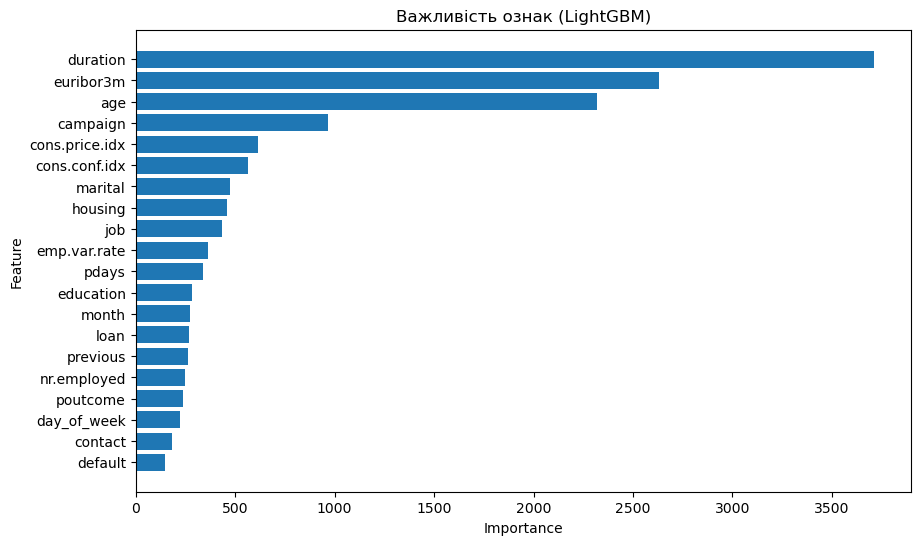

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
clf_lgb.fit(X_train, y_train)
importances = clf_lgb.feature_importances_

feature_importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["feature"][:20], feature_importances["importance"][:20])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Важливість ознак (LightGBM)")
plt.show()


Важливість ознак:
Найбільш вагомим предиктором виявився duration, проте цей параметр не можна використовувати у фінальній моделі, адже його значення відоме лише після завершення дзвінка (data leakage).
Інші ознаки, такі як euribor3m, age, campaign, показали високу значимість і це узгоджується зі здоровим глуздом: макроекономічні фактори, вік клієнта та кількість контактів дійсно можуть впливати на ймовірність згоди. Соціально-демографічні характеристики (marital, job, education) та фінансові змінні (housing, loan, pdays) також мають логічний внесок.
Загалом, пріоритет важливості ознак виглядає адекватним і перетинається з моїми власними висновками під час EDA

[LightGBM] [Info] Number of positive: 2784, number of negative: 21928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 24712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112658 -> initscore=-2.063876
[LightGBM] [Info] Start training from score -2.063876
train 0.9370786153718333
val 0.7970361956931932


C:\Users\hp\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


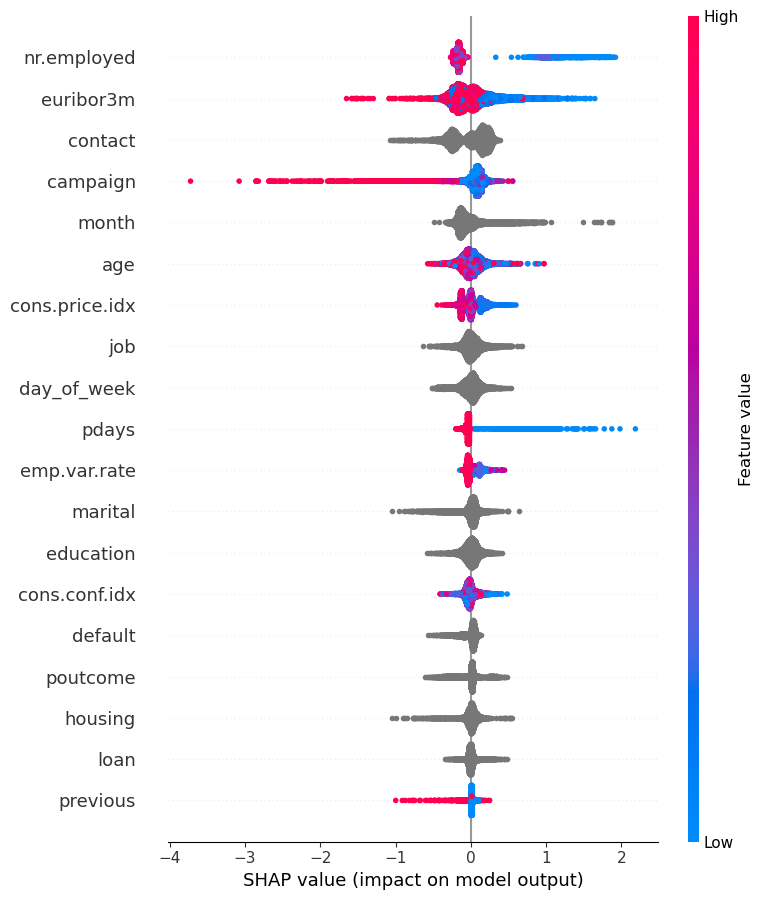

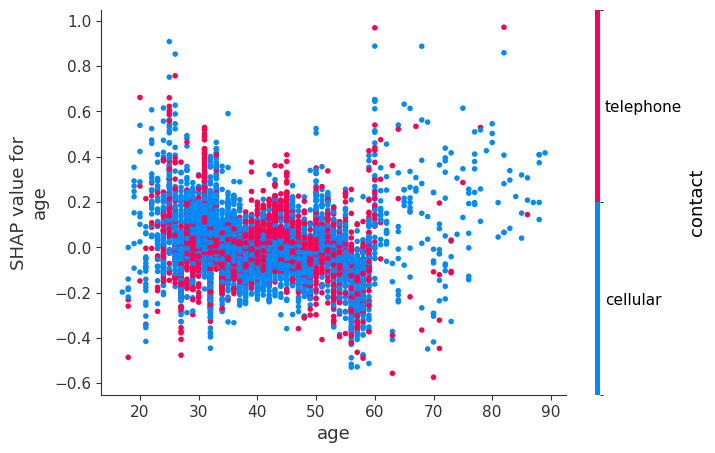

In [304]:
X_train_nodur = X_train.drop(columns=["duration"])
X_val_nodur   = X_val.drop(columns=["duration"])

import shap

final_model = lgb.LGBMClassifier(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
final_model.fit(X_train_nodur, y_train)

predict_proba_auroc(final_model, X_train_nodur, X_val_nodur, y_train, y_val)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_val_nodur)


shap.summary_plot(shap_values, X_val_nodur)
# feature_names = X_train_nodur.columns
# X_val_df = pd.DataFrame(X_val_nodur, columns=feature_names)

shap.dependence_plot("age", shap_values, X_val_nodur)

Точність моделі на валідації значно погіршилась через те, що ми забрали важливу ознаку. Перевіримо її на даних, яких вона ніколи не бачила

In [329]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score

X_train_nodur = X_train.drop(columns=["duration"])
X_val_nodur   = X_val.drop(columns=["duration"])
X_test_nodur  = X_test.drop(columns=["duration"])

X_final = pd.concat([X_train_nodur, X_val_nodur], axis=0)
y_final = pd.concat([y_train, y_val], axis=0)

for col in categorical_cols:
    X_final[col] = X_final[col].astype("category")
    X_test_nodur[col] = X_test_nodur[col].astype("category")

final_lgb = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

final_lgb.fit(X_final, y_final)

y_pred_proba = final_lgb.predict_proba(X_test_nodur)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
Test ROC-AUC: 0.8063733843577529


Наш результат на тестових даних навіть трохи покращівся

In [363]:
import pandas as pd
y_pred = final_lgb.predict(X_test_nodur)

errors = X_test_nodur[(y_pred != y_test)]
errors_labels = pd.DataFrame({'y_true': y_test[y_pred != y_test], 
                              'y_pred': y_pred[y_pred != y_test]})

In [365]:
numeric_cols_nodur = [col for col in numeric_cols if col != "duration"]

errors[numeric_cols_nodur].mean()

for col in categorical_cols:
    print(errors[col].value_counts())

job
admin.           242
technician       126
blue-collar      116
retired           70
services          60
management        51
student           41
entrepreneur      27
self-employed     24
unemployed        23
housemaid         16
unknown            5
Name: count, dtype: int64
marital
married     437
single      274
divorced     88
unknown       2
Name: count, dtype: int64
education
university.degree      285
high.school            180
professional.course    102
basic.9y               101
basic.4y                71
unknown                 33
basic.6y                29
illiterate               0
Name: count, dtype: int64
default
no         723
unknown     78
Name: count, dtype: int64
housing
yes        448
no         335
unknown     18
Name: count, dtype: int64
loan
no         678
yes        105
unknown     18
Name: count, dtype: int64
contact
cellular     666
telephone    135
Name: count, dtype: int64
month
may    179
jul    112
jun    110
apr    103
aug    100
nov     67
mar     4

In [367]:
error_ratio = {}
for col in categorical_cols:

    errors_count = errors[col].value_counts()

    total_count = X_final[col].value_counts()

    error_ratio[col] = (errors_count / total_count).sort_values(ascending=False)
    print(f"\n{col} - Відсоток помилок в цій категорії:\n{error_ratio[col]}")


job - Відсоток помилок в цій категорії:
job
student          0.057665
retired          0.051245
admin.           0.029108
unemployed       0.028822
technician       0.023333
entrepreneur     0.023276
self-employed    0.021838
management       0.021748
unknown          0.018868
services         0.018773
housemaid        0.018713
blue-collar      0.015589
Name: count, dtype: float64

marital - Відсоток помилок в цій категорії:
marital
unknown     0.030769
single      0.029599
divorced    0.023946
married     0.021901
Name: count, dtype: float64

education - Відсоток помилок в цій категорії:
education
university.degree      0.029273
professional.course    0.024332
high.school            0.023697
unknown                0.023622
basic.4y               0.021373
basic.9y               0.020928
basic.6y               0.015550
illiterate             0.000000
Name: count, dtype: float64

default - Відсоток помилок в цій категорії:
default
no         0.027800
unknown    0.011239
yes             

Бачимо, що в деяких категоріях вищій відсоток помилок, це означає, що модель гірше справляється з цією групою. Можливі дії:
- Зібрати більше даних для проблемної категорії.
- Додати нові ознаки, які допомагають моделі розрізняти приклади всередині категорії.
- Інший спосіб кодування категорій (наприклад, target encoding).
- Можлива окрема модель для сильно відмінних категорій.
- Балансування класів всередині категорії, якщо є дисбаланс.
  
Цей аналіз допомагає виявити слабкі місця моделі та поліпшити її.

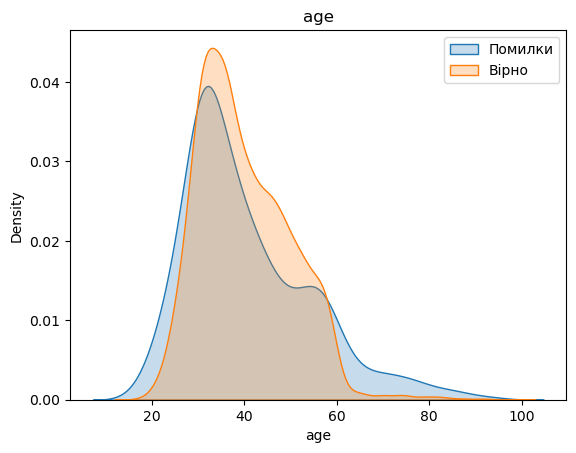

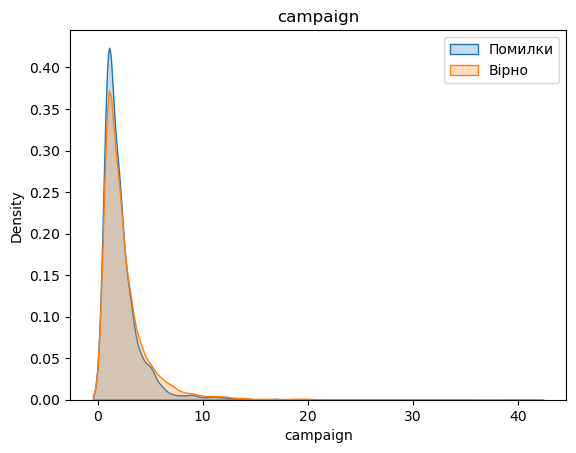

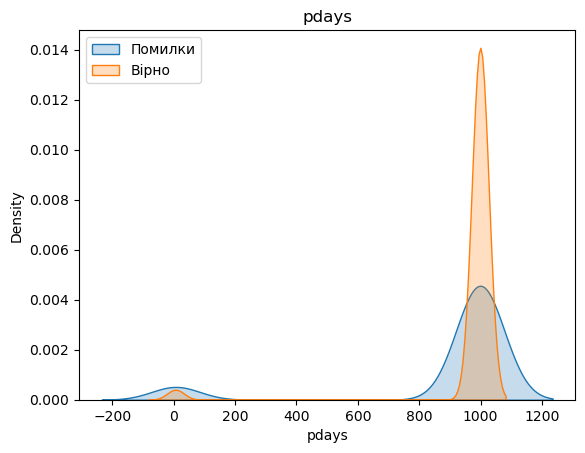

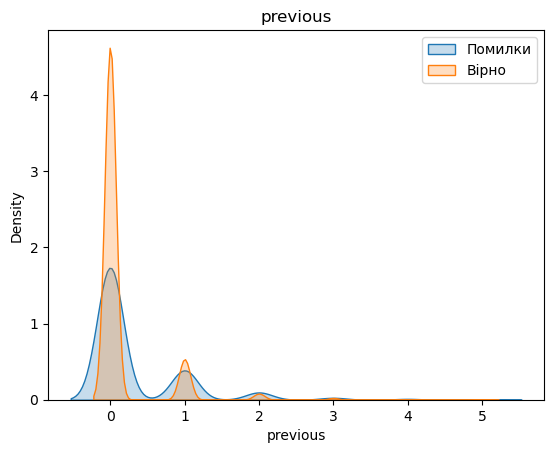

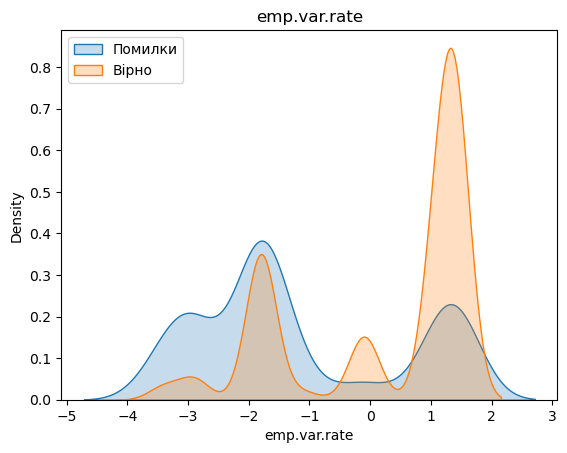

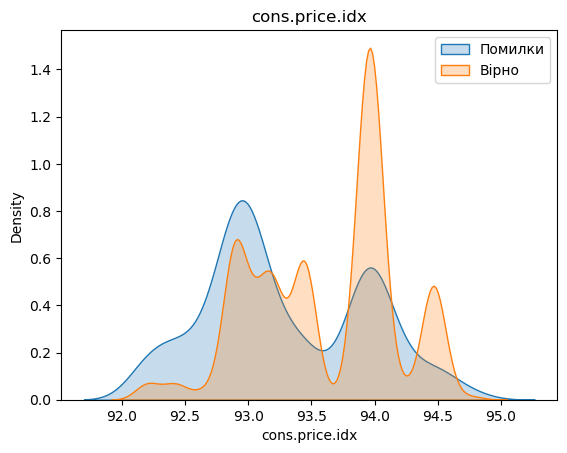

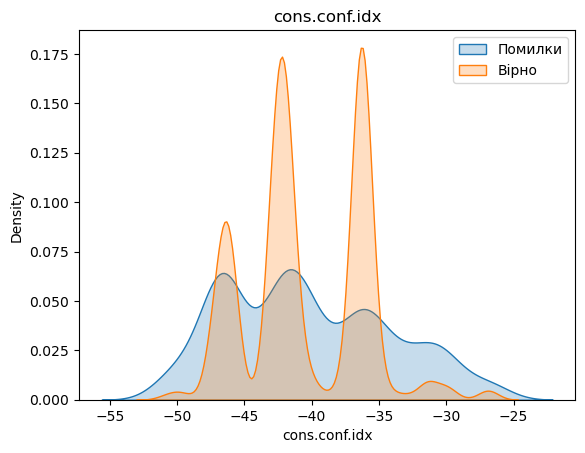

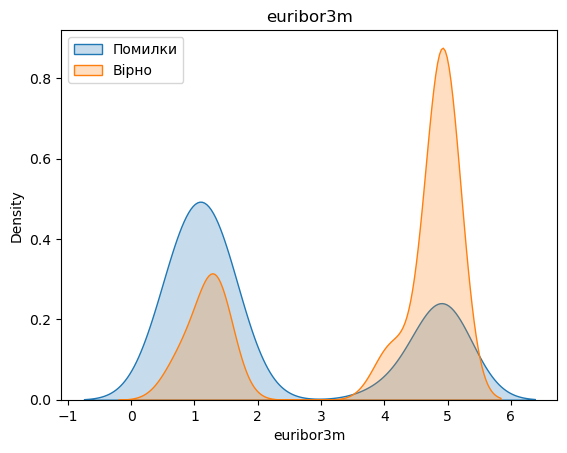

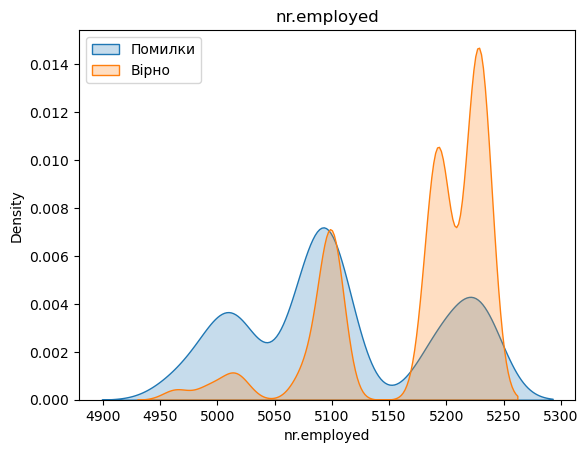

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols_nodur:
    sns.kdeplot(errors[col], label='Помилки', fill=True)
    sns.kdeplot(X_test_nodur[y_pred == y_test][col], label='Вірно', fill=True)
    plt.title(col)
    plt.legend()
    plt.show()

Для кожної числової ознаки ми порівняли розподіл значень у всіх даних та серед записів, де модель помилилася.
Якщо розподіл помилок однорідний по всій ознаці → модель працює стабільно, помилки розкидані рівномірно.
Якщо розподіл помилок сконцентрований у певних діапазонах → модель гірше передбачає для цих значень.

На основі цього можна покращити модель, наприклад:
виділити категорії або групи числових ознак,
створити взаємодії ознак, які впливають на складні випадки,
або додати нові ознаки, що пояснюють помилки.